# 2.3 Exercises - Probability Theory

#### 1. Sampling
Suppose you are the lottery fairy in a weekly lottery, where $6$ out of $49$ *unique* numbers are drawn.

**Instructions:**
  + Draw the winning numbers for this week.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import integrate, stats

In [2]:
np.random.seed(seed=123)
np.random.randint(low=1, high=50, size=6)

array([46,  3, 29, 35, 39, 18])

#### 2. Probability Density Function
Consider a random variable $X$ with probability density function (PDF)

$$f_X(x)=\frac{x}{4}e^{-x^2/8},\quad x\geq 0.$$

**Instructions:**
  + Define the PDF from above as a function <tt>f()</tt>. <tt>exp(a)</tt> computes $e^a$.
  + Check whether the function you have defined is indeed a PDF.

In [3]:
def f(x):
    return x/4*math.exp(-x**2/8)

integrate.quad(f, 0, np.inf)

(1.0, 2.1730298600934144e-09)

#### 3. Expected Value and Variance
In this exercise you have to compute the expected value and the variance of the random variable $X$ considered in the previous exercise.
The PDF <tt>f()</tt> from the previous exercise is available in your working environment.

**Instructions:**
  + Define a suitable function <tt>ex()</tt> which integrates to the expected value of $X$.
  + Compute the expected value of $X$. Store the result in <tt>expected_value</tt>.
  + Define a suitable function <tt>ex2()</tt> which integrates to the expected value of $X^2$.
  + Compute the variance of $X$. Store the result in <tt>variance</tt>.

In [4]:
# define the function ex
def ex(x):
    return x*f(x)

# compute the expected value of X
expected_value = integrate.quad(ex, 0, np.inf)[0]

# define the function ex2
def ex2(x):
    return x**2*f(x)

# compute the variance of X
variance = integrate.quad(ex2, 0, np.inf)[0] - expected_value**2

#### 4. Standard Normal Distribution I

Let $Z\sim\mathcal{N}(0, 1)$.

**Instructions:**
  + Compute $\phi(3)$, that is, the value of the standard normal density at $c=3$.

In [5]:
stats.norm.pdf(3)

0.0044318484119380075

#### 5. Standard Normal Distribution II

Let $Z\sim\mathcal{N}(0, 1)$.

**Instructions:**
  + Compute $P(|Z|\leq 1.64)$ by using the function <tt>pnorm()</tt>.

In [6]:
# compute the probability
stats.norm.cdf(1.64) - stats.norm.cdf(-1.64)

0.8989948330517925

#### 6. Normal Distribution I

Let $Y\sim\mathcal{N}(5, 25)$.

**Instructions:**
  + Compute the 99% quantile of the given distribution, i.e., find $y$ such that $\Phi(\frac{y-5}{5})=0.99$.

In [7]:
# compute the 99% quantile of a normal distribution with mu = 5 and sigma^2 = 25.
stats.norm.ppf(0.99, 5, np.sqrt(25))

16.631739370204205

#### 7. Normal Distribution II

Let $Y\sim\mathcal{N}(2, 12)$.

**Instructions:**
  + Generate $10$ random numbers from this distribution.

In [8]:
# generate 10 random numbers from the given distribution.
stats.norm.rvs(loc=2, scale=np.sqrt(12), size=10, random_state=12)

array([ 3.63847098, -0.36052849,  2.83983505, -3.89152106,  4.60896331,
       -3.31643067,  2.01776072,  1.58351913, -0.79546723, 11.9482742 ])

#### 8. Chi-squared Distribution I

Let $W\sim\chi^2_{10}$.

**Instructions:**
  + Plot the corresponding PDF using <tt>curve()</tt>. Specify the range of x-values as $[0,25]$ via the argument <tt>xlim</tt>.

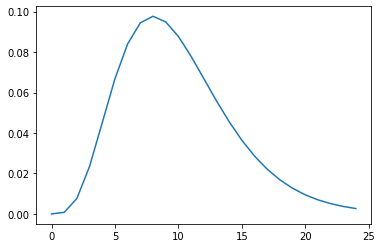

In [9]:
# plot the PDF of a chi^2 random variable with df = 10

x = np.arange(0, 25)
plt.plot(x, stats.chi2.pdf(x, df=10))
plt.show()

#### 9. Chi-squared Distribution II

Let $X_1$ and $X_2$ be two independent normally distributed random variables with $\\mu=0$ and $\\sigma^2=15$.

**Instructions:**
  + Compute $P(X_1^2+X_2^2>10)$.

In [10]:
# compute the probability

stats.chi2.sf(10/15, df=2, loc=0, scale=1)

0.7165313105737892

#### 10. Student t Distribution I

Let $X\sim t_{10000}$ and $Z\sim\mathcal{N}(0,1)$.

**Instructions:**
  + Compute the $95\%$ quantile of both distributions. What do you notice?

In [11]:
# compute the 95% quantile of a t distribution with 10000 degrees of freedom
# qt(0.95, df = 10000)

print(stats.t.ppf(0.95, df = 10000))

# compute the 95% quantile of a standard normal distribution

print(stats.norm.ppf(0.95))

# both values are very close to each other. This is not surprising as for sufficient large degrees of freedom the t distribution can be approximated by the standard normal distribution.

1.6450060180692423
1.6448536269514722


#### 11. Student t Distribution II

Let $X\sim t_1$. Once the session has initialized you will see the plot of the corresponding probability density function (PDF).

**Instructions:**
  + Generate $1000$ random numbers from this distribution and assign them to the variable <tt>x</tt>.
  + Compute the sample mean of <tt>x</tt>. Can you explain the result?

In [12]:
# generate 1000 random numbers from the given distribution. Assign them to the variable x.
x = stats.t.rvs(df = 1, size = 1000, random_state = 1)

# compute the sample mean of x.
np.mean(x)

# Although a t distribution with M = 1 is, as every other t distribution, symmetric around zero it actually has no expectation. This explains the highly non-zero value for the sample mean.

10.845661965991818

#### 12. F Distribution I

Let $Y\sim F(10, 4)$.

**Instructions:**
  + Plot the quantile function of the given distribution using the function <tt>curve()</tt>.

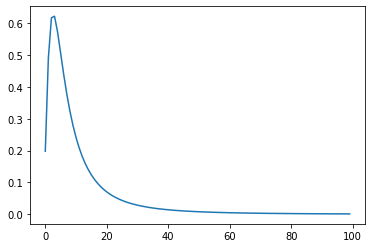

In [13]:
# plot the quantile function of the given distribution

dfn = 10
dfd = 4

x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)

plt.plot(stats.f.pdf(x = x, dfn = dfn, dfd = dfd))
plt.show()

#### 13. F Distribution II

Let $Y\sim F(4,5)$.

**Instructions:**
  + Compute $P(1<Y<10)$ by integration of the PDF.

In [14]:
# compute the probability by integration

dfn = 4
dfd = 5

x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)

def function(x):
    return stats.f.pdf(x = x, dfn = dfn, dfd = dfd)

integrate.quad(function, 1, 10)[0]

0.4723970230052129